# Explaining the Wigner's Friend paradox with Qiskit

Welcome to the code tutorial for the “Wigner's friend” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll help you develop a better understanding of Wigner's much-debated thought experiment using quantum circuits built with Qiskit! 

If you haven't already, I recommend you first watch [our video](https://youtu.be/TMBK88Mpg5U) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment. 

Let's summarise the Wigner's friend thought experiment, simulating each step using Qiskit code: 

### Wigner's Friend thought experiment

In 1961, Nobel Laureate Eugene Wigner proposed the Wigner's friend thought experiment. Wigner's friend is the clearest demonstration of the famous "measurement problem" of quantum mechanics. 

Wigner imagined that his friend measured a quantum system in a superposition of two states — let's model this quantum system as a qubit that starts in an equal superposition of |0⟩ and |1⟩. If you're not familiar with qubits and quantum gates like Hadamard and CNOT, I recommend taking a look at the "Introduction to Quantum Computing" course in the [Qiskit textbook](https://learn.qiskit.org/course/introduction/why-quantum-computing) before returning to this code tutorial. 

When Wigner's friend measures the qubit, the friend sees a single outcome, |0⟩ or |1⟩. The friend declares: "Right now, my measurement has projected the qubit into the 0 state!" or "Right now, my measurement has projected the qubit into the |1⟩ state!" 

To model this as a quantum circuit, in addition to using a qubit to represent that quantum system the friend will measure, I'll use another qubit to represent the memory of Wigner's friend. Both the quantum system qubit and Wigner's friend's memory qubit begin initialised in the |0⟩ state. To prepare the system qubit in a superposition, I apply a Hadamard gate: 

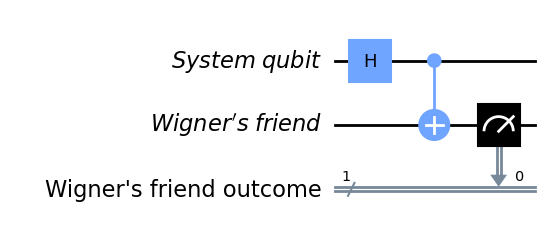

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="System qubit")
qr2 = QuantumRegister(1, name="Wigner's friend")
cr1 = ClassicalRegister(1, name="Wigner's friend outcome")

qc= QuantumCircuit(qr1, qr2, cr1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw("mpl")

The Hadamard gate acts on a |0⟩ state as follows:

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Then, to model Wigner's friend's measurement of the system qubit, I apply a CNOT gate with the system qubit as the control and Wigner's friend's memory as the target. IThen, if the system qubit is |0⟩, the memory qubit records |0⟩. I, and if the system qubit is |1⟩, the memory qubit is flipped by an X-gate to record a |1⟩. 

$$CNOT\frac{1}{2}(|0\rangle + |1\rangle)|0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Finally I've added an irreversible measurement operation to Wigner's friend's memory qubit. This means that in each run of the circuit, there is only a single outcome: Wigner's friend either sees |0⟩ or |1⟩. 

Let's run this circuit: 

Wigner's friend Counts:  {'0': 474, '1': 550}


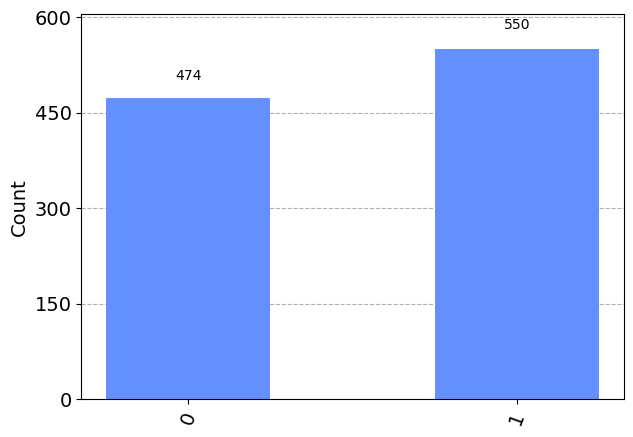

In [2]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

backend = AerSimulator()
result = backend.run(qc).result()

print("Wigner's friend Counts: ", result.get_counts())
plot_histogram(result.get_counts())

Wigner's friend either sees |0⟩ or |1⟩ in each run.

Now let’s imagine that until this point, Wigner has been completely isolated from his friend. He cannot peek over his friend’s shoulder and see the measurement for himself. He only learns which state the system has projected into once he asks his friend to share the information and gets the answer. This means that, from Wigner’s perspective, both his friend and the qubit exist in an entangled superposition until the moment the friend declares which state has been measured. More specifically, they exist in a superposition of the qubit being |0⟩ and the friend's memory being |0⟩, and the qubit being |1⟩ and the friend's memory being |1⟩. 

Wigner asks his friend which outcome the friend has measured. The friend answers, giving Wigner a single outcome, |0⟩ or |1⟩. Then Wigner declares: "Right now, my measurement has projected the qubit and my friend into the |0⟩ state!" or "Right now, my measurement has projected the qubit and my friend into the |1⟩ state!". 

To model Wigner's version of events as a quantum circuit, we need to introduce a qubit for Wigner's memory, a CNOT gate to entangle Wigner's memory qubit with his friend's memory qubit, and finally an irreversible measurement operation on Wigner's memory qubit: 

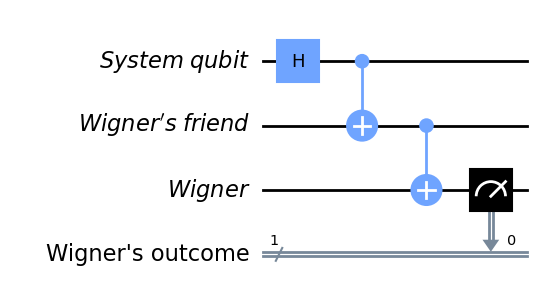

In [3]:
qr3 = QuantumRegister(1, name="Wigner")
cr2 = ClassicalRegister(1, name="Wigner's outcome")

qc2= QuantumCircuit(qr1, qr2,qr3, cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure(2,0)

qc2.draw("mpl")

Let's run the circuit:

Wigner's Counts:  {'1': 508, '0': 516}


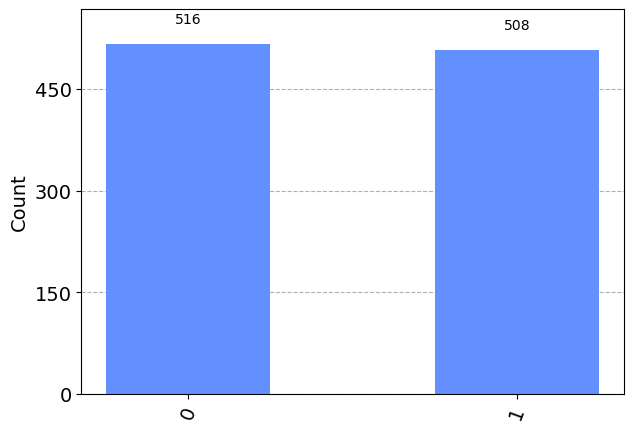

In [4]:
result = backend.run(qc2).result()

print("Wigner's Counts: ", result.get_counts())
plot_histogram(result.get_counts())

When Wigner learns the outcome of his friend’s measurement, he sees a single outcome of either |0⟩ or of |1⟩. 

So, when was the qubit actually projected into one of these states?  If the act of observation causes an irreversible collapse, then there is a contradiction: Wigner's friend says the irreversible collapse happened the moment the friend measured the qubit, whereas Wigner says the irreversible collapse happened the moment Wigner measured his friend's outcome. 

Let's look at the full quantum circuit from Wigner's friend's perspective: 

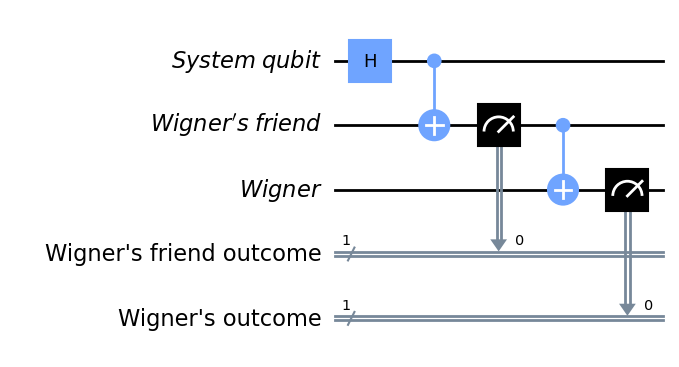

In [5]:
qc3= QuantumCircuit(qr1, qr2, qr3, cr1, cr2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure(qr2,cr1)
qc3.cx(1,2)
qc3.measure(qr3, cr2)

qc3.draw("mpl")

Compare this to the full quantum circuit from Wigner's perspective: 

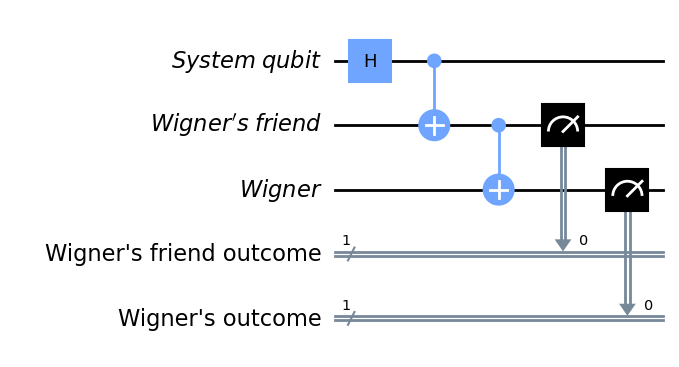

In [6]:
qc4= QuantumCircuit(qr1, qr2, qr3, cr1, cr2)
qc4.h(0)
qc4.cx(0,1)
qc4.cx(1,2)
qc4.measure(qr2,cr1)
qc4.measure(qr3, cr2)

qc4.draw("mpl")

The two quantum circuits disagree on whether the irreversible measurement on Wigner's friend's memory should be before or after the 2nd CNOT gate, i.e., whether it should be before Wigner's measurement of his friend's result, or after it. The "principle of deferred measurement" in quantum computing tells us that pushing an irreversible measurement through a control in a quantum circuit will make no difference to the distribution of measurement outcomes, so we will always get the same distribution of final outcomes either way, which we can see from running simulations of both circuits:

In [7]:
result = backend.run(qc3).result()

print("Wigner's Friend's Counts: ", result.get_counts())

Wigner's Friend's Counts:  {'0 0': 498, '1 1': 526}


In [8]:
result = backend.run(qc4).result()

print("Wigner's Counts: ", result.get_counts())

Wigner's Counts:  {'1 1': 513, '0 0': 511}


However, Wigner and his friend disagree on the explanation for those outcomes. We'll see in the next installment of the Paradoxes series how in a modified circuit, the difference between Wigner and his friend's explanations actually leads to different final outcomes. 

This contradiction between Wigner and his friend's accounts of where the irreversible measurement should go is a version of the famous measurement problem of quantum mechanics. 

The conventional explanation of measurement in quantum mechanics is known as the "Copenhagen interpretation", which generally suggests that observation of a quantum system causes it to irreversibly collapse into a single state. The Copenhagen interpetation is so loosely defined that it gives no explanation for how measurement actually happens!  It cannot resolve the Wigner's friend paradox, because it simply doesn't say anything else about measurement that could explain whose version of events is right. 

One resolution to the Wigner's friend paradox is to get rid of irreversible measurement operations altogether, and treat all measurements as entangling interactions between quantum systems. Treating both Wigner's friend's measurement and Wigner's measurement using this approach leads to the following quantum circuit: 

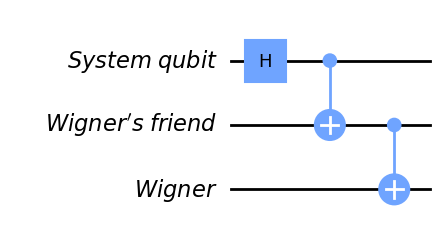

In [9]:
qc5= QuantumCircuit(qr1, qr2, qr3)
qc5.h(0)
qc5.cx(0,1)
qc5.cx(1,2)

qc5.draw("mpl")

Here we have no contradiction between the experiences of Wigner and his friend: Wigner's friend sees a single measurement outcome while entering an entangled superposition with the qubit, and Wigner sees a single measurement outcome when Wigner experiences an entangling interaction with the friend and joins in that entangled superposition, giving this as the final state:

$$\frac{1}{2}(|000\rangle + |111\rangle)$$

Treating Wigner and his friend as fully quantum systems, without any irreversible measurement operations therefore resolves the paradox!

### Schrödinger's cat in disguise

If you watched my previous video on the Schrödinger's cat thought experiment, you may have noticed a pattern emerging: my Wigner's friend quantum circuit is exactly the same as my Schrödinger's cat quantum circuit, but with the atom, cat and observer replaced by the system qubit, Wigner's friend and Wigner! 

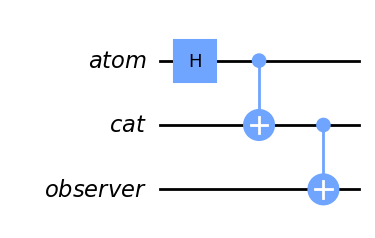

In [10]:
qr_atom = QuantumRegister(1, name="atom")
qr_cat = QuantumRegister(1, name="cat")
qr_observer = QuantumRegister(1, name="observer")

qc_cat = QuantumCircuit(qr_atom, qr_cat, qr_observer)

qc_cat.h(qr_atom[0])

qc_cat.cx(qr_atom[0], qr_cat[0])

qc_cat.cx(qr_cat[0], qr_observer[0])

qc_cat.draw("mpl")

The apparent paradoxes arising from both these thought experiments are very similar in that both can be resolved by applying quantum theory to macroscopic systems, such as detectors, observers and the environment. However, the thought experiments point out different problems in quantum mechanics: Schrodinger's cat points out the absurdity of applying quantum mechanics to macroscopic systems, since it means a cat can be dead and alive simultaneously. On the other hand, Wigner's friend points out a contradiction with the vague notion that observation causes irreversible collapse, since observers will disagree about when the collapse happens. 

Wigner's friend in fact reveals the problem with a naïve solution to Schrodinger's cat: one might say, the cat is an observer, so it will collapse the quantum state of the radioactive atom and never itself enter a superposition of states. Wigner's friend demonstrates that this reasoning leads to a contradiction, since the observer of the cat, and the cat itself, will disagree about when the irreversible collapse happens. 

### Can't we just test it out? 

Could we come up with an experimental test to find out whether or notWigner's friend performs an irreversible measurement? Find out in the next installment of the Paradoxes series. See you next time! 